# Data -> PCA -> LSTM

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.cluster import KMeans
import seaborn as sns
from pandas import DataFrame as df

from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from pandas import DataFrame as df
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score    
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import BaggingClassifier

In [96]:
LR1 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/LR/*.csv')
LR2 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/LR2/*.csv')

RL1 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/RL/*.csv')
RL2 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/RL2/*.csv')

CW1 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/CW/*.csv')
CW2 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/CW2/*.csv')

CCW1 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/CCW/*.csv')
CCW2 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/CCW2/*.csv')

DOWN1 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/DOWN/*.csv')
DOWN2 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/DOWN2/*.csv')

UP1 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/UP/*.csv')
UP2 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/new_datas/datas/UP2/*.csv')

# Kmeans a ~ c-d, 제스쳐 1,0 같이 있는거
### 1,0 같이 있는거는 맨 마지막 제스쳐 판별(1:제스쳐) 0은 없는 게 나은 걸지도 모름, 무조건 많으면 좋은게 아니라 더 헷갈릴 수 있음

In [104]:
LR1_1 = pd.read_csv(LR1[0],names=['n3','n2','a','b','c','d','a-b','c-d','n','n1'])
LR1_1.drop(['n3', 'n2', 'n1'], axis='columns', inplace=True)

RL1_1 = pd.read_csv(RL1[0],names=['n3','n2','a','b','c','d','a-b','c-d','n','n1'])
RL1_1.drop(['n3', 'n2', 'n1'], axis='columns', inplace=True)


CW1_1 = pd.read_csv(LR1[0],names=['n3','n2','a','b','c','d','a-b','c-d','n','n1'])
CW1_1.drop(['n3', 'n2', 'n1'], axis='columns', inplace=True)

CCW1_1 = pd.read_csv(RL1[0],names=['n3','n2','a','b','c','d','a-b','c-d','n','n1'])
CCW1_1.drop(['n3', 'n2', 'n1'], axis='columns', inplace=True)

LR1_1["n"] = 0
RL1_1["n"] = 1
CW1_1["n"] = 2
CCW1_1["n"] = 3

total1_1 = pd.concat([LR1_1,RL1_1,CW1_1,CCW1_1])

In [105]:
total1_1

,a,b,c,d,a-b,c-d,n
0,-0.105279,0.045455,-0.034666,-0.027996,-0.150734,-0.006670,0
1,-0.108044,0.044301,-0.035562,-0.029861,-0.152344,-0.005702,0
2,-0.108884,0.044842,-0.034635,-0.029891,-0.153725,-0.004744,0
3,-0.107509,0.047354,-0.031749,-0.027956,-0.154863,-0.003793,0
4,-0.104009,0.051747,-0.027207,-0.024357,-0.155756,-0.002850,0
...,...,...,...,...,...,...,...
795,-0.306390,-0.529995,-0.445203,-0.324031,0.223605,-0.121173,3
796,-0.308298,-0.531856,-0.446457,-0.324883,0.223558,-0.121574,3
797,-0.311948,-0.535205,-0.449288,-0.327437,0.223257,-0.121851,3
798,-0.316720,-0.539319,-0.452949,-0.330962,0.222598,-0.121987,3


In [112]:
Kmean = KMeans(n_clusters=4)
Kmean.fit(total1_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

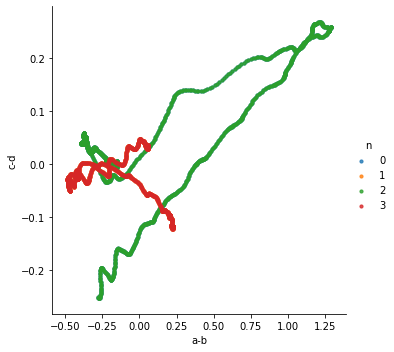

In [113]:
sns.lmplot('a-b','c-d',data=total1_1,fit_reg=False,scatter_kws={"s":10},hue="n")

TypeError: scatter() got multiple values for argument 's'

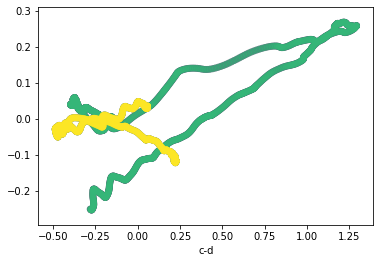

In [117]:
model = KMeans(n_clusters=4,algorithm='auto')
model.fit(total1_1)

predict = pd.DataFrame(model.predict(total1_1))
predict.columns=['predict']

plt.scatter(total1_1['a-b'],total1_1['c-d'],c=total1_1['n'],alpha=0.5)

centers = pd.DataFrame(model.cluster_centers_,columns=['a','b','c','d','a-b','c-d','n'])
labels = ['0', '1', '2', '3']

center_x = centers['a-b']
center_y = centers['c-d']

plt.xlabel('a-b')
plt.xlabel('c-d')
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [110]:
data_points = total1_1
kmeans = KMeans(n_clusters=4).fit(data_points)
kmeans.labels_.shape

(3600,)

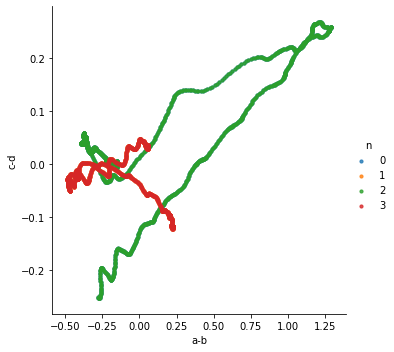

In [111]:
sns.lmplot('a-b','c-d',data=total1_1,fit_reg=False,scatter_kws={"s":10},hue="n")

In [56]:
LR1_1.drop(['n3', 'n2', 'n'], axis='columns', inplace=True)
for i in range(len(LR1_1)):
    if(LR1_1.n1[i] == 0):
        LR1_1.drop([i],axis='rows',inplace=True)
        
LR1_1.drop(['n1'], axis='columns', inplace=True)
LR1_1

,a,b,c,d,a-b,c-d
0,-0.105279,0.045455,-0.034666,-0.027996,-0.150734,-0.006670
1,-0.108044,0.044301,-0.035562,-0.029861,-0.152344,-0.005702
2,-0.108884,0.044842,-0.034635,-0.029891,-0.153725,-0.004744
3,-0.107509,0.047354,-0.031749,-0.027956,-0.154863,-0.003793
4,-0.104009,0.051747,-0.027207,-0.024357,-0.155756,-0.002850
...,...,...,...,...,...,...
695,-0.238852,-0.982636,-0.648065,-0.759003,0.743784,0.110938
696,-0.246902,-0.984729,-0.653497,-0.762019,0.737827,0.108522
697,-0.255653,-0.987715,-0.659437,-0.765508,0.732063,0.106071
698,-0.264319,-0.990753,-0.665049,-0.768631,0.726434,0.103582
